# Final Project 

- Dataset: https://www.kaggle.com/PromptCloudHQ/imdb-data
- Notes: https://www.analyticsvidhya.com/blog/2019/04/predicting-movie-genres-nlp-multi-label-classification/
---

## About Dataset


### Movie Dataset 

- 1,000 most popular movies on IMDB in 10 years from 2006-2016. 
- There are 12 Feature: 
    - Title, Genre, Description, Director, Actors, Year, Runtime, Rating, Votes, Revenue, Metascrore
- I am going to train a model that uses the description written about the movie and predict movie genres
    



# Goal: Predicting the Genre of the Movie Using its Description

# Importing the packeges

In [88]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier
# Performance metric
from sklearn.metrics import f1_score

from sklearn.preprocessing import MultiLabelBinarizer

import matplotlib.pyplot as plt
import seaborn as sns
# % matplotlib inline

from wordcloud import WordCloud, STOPWORDS

### copying stopwords dictionary E.g. the, a, but, etc.

In [89]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sukhrobjongolibboev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Data Exploration

### Load Data

In [90]:
# read the file
df = pd.read_csv("movies.csv")

In [91]:
df.head() 

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [92]:
# looking at the length of the 1st description to get a picture how long a descriotion can be
word_count = (df["Description"].values[0]).split(" ")
print("list of words from a description: {}\n Word count:{}".format(word_count, len(word_count)))


list of words from a description: ['A', 'group', 'of', 'intergalactic', 'criminals', 'are', 'forced', 'to', 'work', 'together', 'to', 'stop', 'a', 'fanatical', 'warrior', 'from', 'taking', 'control', 'of', 'the', 'universe.']
 Word count:21


## GOAL: More EDA and Visualization!

### Function removes stopwords to remove noise 

In [93]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    """Removes stopwords and lowercase the words"""
    no_stopword_text = [word for word in text.split() if not word in stop_words]
    return ' '.join(no_stopword_text)

df['Description'] = df['Description'].apply(lambda x: remove_stopwords(x.lower()))

In [94]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",group intergalactic criminals forced work toge...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","following clues origin mankind, team finds str...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",three girls kidnapped man diagnosed 23 distinc...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","city humanoid animals, hustling theater impres...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",secret government agency recruits dangerous in...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


# Steps:
1. Spliting input and target (input is descriptoin, movie genre would be the output)
2. One-hot encoding 
3. multi-label classification
    - Since movies are not one-dimensional. One movie can span several genres. Now THAT is a challenge I love to embrace as a data scientist. I extracted a bunch of movie plot summaries and got down to work using this concept of multi-label classification. And the results, even using a simple model, are truly impressive.

### Creating a dataset that will be suited to fit our model
- so we can have easier dataset to work with to do train test split part.
- The we have input and output. Independed variable "Description" column and our target, depended variable will  be movie genres we want to predict.

In [95]:
# copying the Description and Genre of a movie
dataset = pd.DataFrame(df[["Description", "Genre"]])

### Overwriting Old Genre Data with New Genres Objects

In [96]:
genres = list()

for item in dataset["Genre"]:
    genres.append(item.split(","))

dataset["Genre"] = genres

### Now we have a desired dataset 

In [97]:
dataset.head(3)

,Description,Genre
0,group intergalactic criminals forced work toge...,"[Action, Adventure, Sci-Fi]"
1,"following clues origin mankind, team finds str...","[Adventure, Mystery, Sci-Fi]"
2,three girls kidnapped man diagnosed 23 distinc...,"[Horror, Thriller]"


In [98]:
# check how many genres we have 

In [99]:
all_genres = list(data_mlb.classes_)
all_genres

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [81]:
len(all_genres)

20

- There are 20 unique genre tags in our dataset. But we dont how much each genre occured
We will use FreqDist( ) from the nltk library to create a dictionary of genres 
and their occurrence count across the dataset:



In [102]:
dataset["Genre"].unique

<bound method Series.unique of 0         [Action, Adventure, Sci-Fi]
1        [Adventure, Mystery, Sci-Fi]
2                  [Horror, Thriller]
3         [Animation, Comedy, Family]
4        [Action, Adventure, Fantasy]
5        [Action, Adventure, Fantasy]
6              [Comedy, Drama, Music]
7                            [Comedy]
8      [Action, Adventure, Biography]
9         [Adventure, Drama, Romance]
10       [Adventure, Family, Fantasy]
11        [Biography, Drama, History]
12        [Action, Adventure, Sci-Fi]
13     [Animation, Adventure, Comedy]
14            [Action, Comedy, Drama]
15     [Animation, Adventure, Comedy]
16        [Biography, Drama, History]
17                 [Action, Thriller]
18                 [Biography, Drama]
19           [Drama, Mystery, Sci-Fi]
20       [Adventure, Drama, Thriller]
21                            [Drama]
22             [Crime, Drama, Horror]
23     [Animation, Adventure, Comedy]
24        [Action, Adventure, Sci-Fi]
25                 

## Now we have histogram for genres. Let's visualize them.

In [ ]:

# read each genre list
#     count the occurance
# visualize genres
all_genres = nltk.FreqDist(all_genres) 
print(all_genres.items())
# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})

all_genres_df.head()




g = all_genres_df.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()



In [11]:
# initialize multilabel model 
data_mlb = MultiLabelBinarizer()

data_mlb.fit(dataset['Genre'])


# transform target variable
target = data_mlb.transform(dataset['Genre'])

In [14]:
# training and validation set
X_train, X_test, y_train, y_test = train_test_split(dataset["Description"], 
                                                    target, 
                                                    train_size=0.75, 
                                                    test_size=0.25)

In [15]:
tfidf_proc = TfidfVectorizer(max_df=0.8, max_features=10000)

X_train_TFIDF = tfidf_proc.fit_transform(X_train)
X_test_TFIDF = tfidf_proc.transform(X_test)

## GOAL: Test multiple different classification models!

In [16]:
logreg_model = LogisticRegression() # we're still doing classification! 
clf = OneVsRestClassifier(logreg_model)

In [17]:
# fit model on train data
clf.fit(X_train_TFIDF, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None)

In [18]:
# make predictions for validation set
y_pred = clf.predict(X_test_TFIDF)

In [19]:
y_pred[:20]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0,

In [83]:
naive_sample = 22
y_pred[naive_sample]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Transform the multi-lable model to word(movie genre) 

In [84]:
data_mlb.inverse_transform(y_pred)[naive_sample]

('Drama',)

## Evaluate the first naive model f1_score

In [22]:
# evaluate performance
f1_score(y_test, y_pred, average="micro")

0.2451108213820078

# Optimizing the model decrease the treshold using .predict_proba()

In [23]:
# predict probabilities
y_pred_proba = clf.predict_proba(X_test_TFIDF)
y_pred_proba

array([[0.29703463, 0.17152047, 0.04911831, ..., 0.22448298, 0.01850186,
        0.01320585],
       [0.30124104, 0.24971239, 0.04562825, ..., 0.20415141, 0.0184346 ,
        0.0142558 ],
       [0.2794577 , 0.23212634, 0.04805686, ..., 0.22297408, 0.02166431,
        0.01340815],
       ...,
       [0.23674697, 0.23126279, 0.05690507, ..., 0.18723449, 0.01935693,
        0.01423896],
       [0.33728262, 0.18110164, 0.05010595, ..., 0.26877014, 0.02007962,
        0.01282481],
       [0.35156453, 0.30116291, 0.06408672, ..., 0.20145338, 0.02127563,
        0.01322334]])

In [51]:
threshold = 0.27 # threshold value
y_pred_corrected = (y_pred_proba >= threshold).astype(int)

## GOAL: Use `GridSearchCV` or Custom Hyperparameter Tuning to Boost Performance!

In [52]:
# evaluate performance
f1_score(y_test, y_pred_corrected, average="micro")

0.46875000000000006

In [53]:
# now checking the model with new threshold

In [54]:
sample = 34
y_pred_corrected[sample]

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [55]:
data_mlb.inverse_transform(y_pred_corrected)[sample]

('Comedy', 'Drama')

In [56]:
manual_check = 99
print(y_test[manual_check])
print(y_pred_corrected[manual_check])

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [57]:
# check the results
iterations = len(y_pred_corrected)
y_pred_transform_to_genre = []
for i in range(iterations):
    y_pred_transform_to_genre.append(data_mlb.inverse_transform(y_pred_corrected)[i])
y_pred_transform_to_genre

[('Action', 'Comedy', 'Crime', 'Drama'),
 ('Action', 'Comedy', 'Drama'),
 ('Action', 'Drama'),
 ('Action', 'Comedy', 'Drama'),
 ('Action', 'Comedy', 'Drama'),
 ('Action', 'Adventure', 'Comedy', 'Drama'),
 ('Comedy', 'Drama'),
 ('Action', 'Adventure', 'Comedy', 'Drama'),
 ('Action', 'Comedy', 'Drama'),
 ('Action', 'Adventure', 'Comedy', 'Drama'),
 ('Drama',),
 ('Action', 'Comedy', 'Drama'),
 ('Action', 'Drama'),
 ('Action', 'Adventure', 'Drama'),
 ('Comedy', 'Drama'),
 ('Comedy', 'Drama'),
 ('Action', 'Adventure', 'Drama'),
 ('Action', 'Adventure', 'Comedy', 'Drama'),
 ('Comedy', 'Drama'),
 ('Adventure', 'Comedy', 'Drama'),
 ('Comedy', 'Drama'),
 ('Action', 'Adventure', 'Comedy', 'Drama'),
 ('Action', 'Comedy', 'Drama'),
 ('Drama',),
 ('Action', 'Comedy', 'Drama'),
 ('Action', 'Drama'),
 ('Comedy', 'Drama'),
 ('Action', 'Adventure', 'Drama'),
 ('Comedy', 'Drama'),
 ('Action', 'Adventure', 'Drama'),
 ('Action', 'Adventure', 'Drama'),
 ('Action', 'Drama'),
 ('Action', 'Comedy', 'Drama'),


In [31]:
data_mlb

MultiLabelBinarizer(classes=None, sparse_output=False)

## Create Word Cloud

In [32]:
def create_wordcloud(dataset):
    text = " ".join(desc for desc in dataset)
    wordcloud = WordCloud(width=1500, height=800, max_font_size=200, background_color = 'White').generate(text)
    plt.figure(figsize=(20,15))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

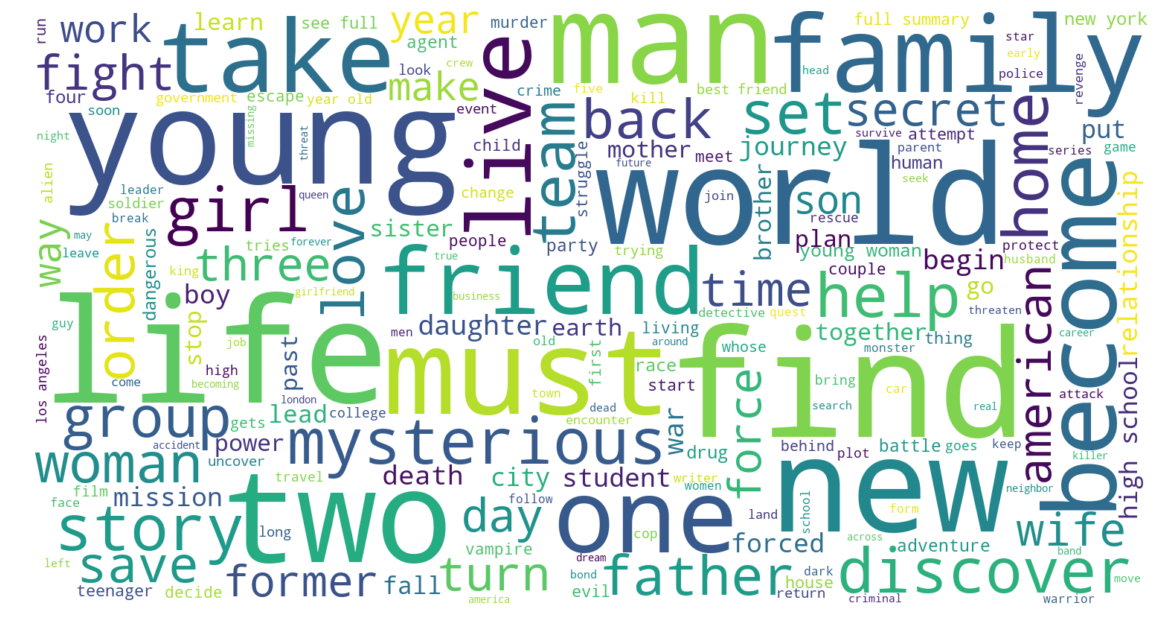

In [33]:
create_wordcloud(dataset["Description"])

## Super cool code! 

Another way to perform **multilabel binarization** without the package!

In [34]:
# label_binarization = dataset.Genre.str.split(',', expand=True).stack()
# mlb_data = pd.get_dummies(label_binarization, prefix='is').groupby(level=0).sum()
# dataset = dataset.join(mlb_data)
# dataset.drop(columns=["Genre"], inplace=True)